# 第二次恒星物理编程作业

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
r = np.linspace(0.001,1,200)

## 计算本地重力加速度$g(r_{i})$

$g(r_{i})=\frac{Gm(r_{i})}{r_{i}^2}\,\Rightarrow \frac{g(r)}{GM/R^2}=\frac{m(r)R^2}{Mr^2}=\frac{m(r)}{M}\frac{1}{(r/R)^2}$

In [4]:
h = r[1]-r[0]

In [5]:
def m_r(r):#上一次作业推倒的结果
    #归一化的
    m = 15/2*(r**2)*(1-r**2)
    return m

In [6]:
m_num = np.zeros(200)
g_num = np.zeros(200)

In [7]:
m_num[0] = 0.5*m_r(r[0])
for i in np.arange(1,len(m_num)-1):
    m_num[i] = m_num[i-1] + m_r(r[i])
m_num[-1] = m_num[-2] + 0.5*m_r(r[-1])
m_num = m_num*h
g_num = m_num/(np.power(r,2))

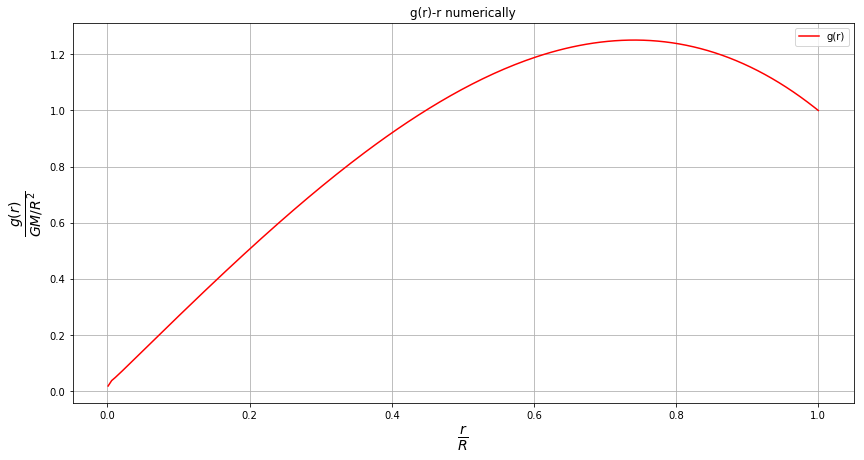

In [8]:
plt.figure(figsize=(14,7))
plt.plot(r,g_num,'r',label='g(r)')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{g(r)}{GM/R^2}$',fontsize=20)
plt.grid()
plt.title('g(r)-r numerically')
plt.legend()
#plt.savefig('mass.pdf',dpi=600)
plt.show()

## 计算压强$P(r_{i})$

$P_{c}\approx(4\pi)^{\frac{1}{3}}0.347GM^{\frac{2}{3}}\rho_{c}^{\frac{4}{3}},\,\,\,\,\,\rho_{c}=\frac{15M}{8\pi R^3}$

$\frac{dP}{dr}=-\rho(r)g(r)\,\Rightarrow P(r)=-\int_{0}^{r}\rho_{c}[1-(\frac{r}{R})^2]g(r)dr+P_{c}$  
$\Rightarrow \frac{P(r)}{P_{c}}=-\int_{0}^{r}\frac{(4\pi)^{-1/3}}{0.347}\frac{1}{GM^{2/3}\rho_{c}^{4/3}}\rho_{c}[1-(\frac{r}{R})^2]\frac{GM}{R^2}\frac{g(r)}{GM/R^2}dr+1$  
$\Rightarrow \frac{P(r)}{P_{c}}=-\frac{(4\pi)^{-1/3}}{0.347}\int_{0}^{r}\frac{M^{1/3}}{\rho_{c}^{1/3}R^2}[1-(\frac{r}{R})^2]\frac{g(r)}{GM/R^2}dr+1$  
$\Rightarrow \frac{P(r)}{P_{c}}=-\frac{1}{0.347}(\frac{2}{15})^{\frac{1}{3}}\int_{0}^{r}[1-(\frac{r}{R})^2]\frac{g(r)}{GM/R^2}d\frac{r}{R}+1$

In [19]:
def p_r(r,g):
    a = -1/0.347
    b = np.power(2/15,1/3)
    p = a*b*(1-r**2)*g
    return p

In [20]:
p_num = np.zeros(200)

In [21]:
p_num[0] = 0.5*p_r(r[0],g_num[0])
for i in np.arange(1,len(p_num)-1):
    p_num[i] = p_num[i-1] + p_r(r[i],g_num[i])
p_num[-1] = p_num[-2] + 0.5*p_r(r[-1],g_num[-1])
p_num = p_num*h+1

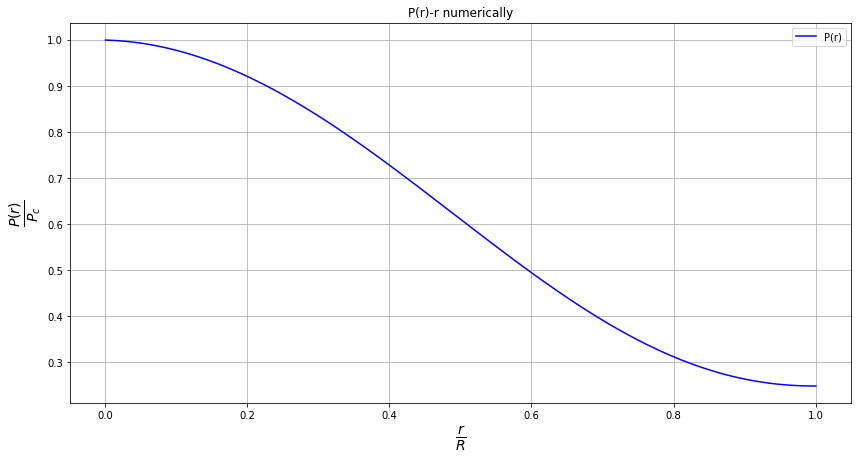

In [23]:
plt.figure(figsize=(14,7))
plt.plot(r,p_num,'b',label='P(r)')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{P(r)}{P_{c}}$',fontsize=20)
plt.grid()
plt.title('P(r)-r numerically')
plt.legend()
#plt.savefig('mass.pdf',dpi=600)
plt.show()

# 解析解

## g(r)

由第一次作业得$m(r)=\frac{15M}{2}(\frac{r}{R})^{3}[\frac{1}{3}-\frac{1}{5}(\frac{r}{R})^2]\,\,\Rightarrow g(r)=\frac{15GM}{2r^2}(\frac{r}{R})^3[\frac{1}{3}-\frac{1}{5}(\frac{r}{R})^2]$  
$\Rightarrow \frac{g(r)}{GM/R^2}=\frac{15}{2}\frac{r}{R}[\frac{1}{3}-\frac{1}{5}(\frac{r}{R})^2]$

In [25]:
r_ana = np.linspace(0,1,200)
g_ana = np.zeros(200)

In [26]:
g_ana = 15./2*r_ana*(1./3-1./5*(r_ana**2))

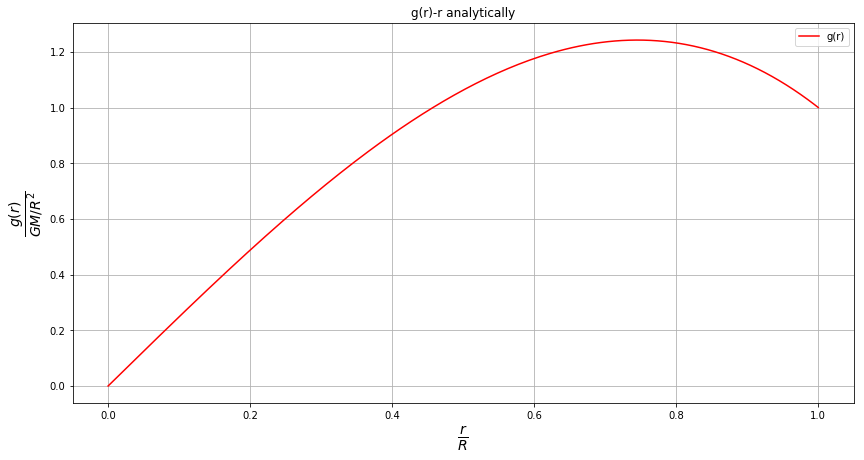

In [27]:
plt.figure(figsize=(14,7))
plt.plot(r_ana,g_ana,'r',label='g(r)')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{g(r)}{GM/R^2}$',fontsize=20)
plt.grid()
plt.title('g(r)-r analytically')
plt.legend()
#plt.savefig('mass.pdf',dpi=600)
plt.show()

## P(r)

$P(r)=-\int_{0}^{r}\rho(r)g(r)dr+P_{c}$  
$\Rightarrow \frac{P(r)}{P_{c}}=-\int_{0}^{r}\frac{\rho_{c}}{P_{c}}[1-(\frac{r}{R})^2]\frac{GM}{R^2}\frac{g(r)}{GM/R^2}dr+1$  
$\Rightarrow \frac{P(r)}{P_{c}}=-\frac{1}{0.347}(\frac{15}{2})^{\frac{2}{3}}\int_{0}^{r}[1-(\frac{r}{R})^2]\frac{r}{R}[\frac{1}{3}-\frac{1}{5}(\frac{r}{R})^2]d(\frac{r}{R})+1$  
$\Rightarrow \frac{P(r)}{P_{c}}=-\frac{1}{0.347}(\frac{15}{2})^{\frac{2}{3}}[\frac{1}{6}(\frac{r}{R})^2-\frac{2}{15}(\frac{r}{R})^4+\frac{1}{30}(\frac{r}{R})^6]+1$

In [24]:
a = -1/0.347
b = np.power(7.5,2/3)

In [28]:
p_ana = np.zeros(200)

In [29]:
p_ana = a*b*(1./6*(r_ana**2)-2./15*(r_ana**4)+1./30*(r_ana**6))+1

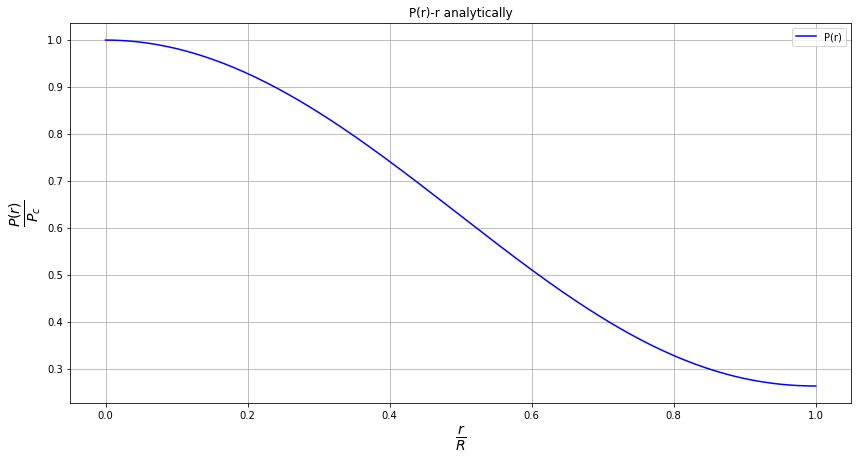

In [30]:
plt.figure(figsize=(14,7))
plt.plot(r_ana,p_ana,'b',label='P(r)')
plt.xlabel(r'$\frac{r}{R}$',fontsize=20)
plt.ylabel(r'$\frac{P(r)}{P_{c}}$',fontsize=20)
plt.grid()
plt.title('P(r)-r analytically')
plt.legend()
#plt.savefig('mass.pdf',dpi=600)
plt.show()